# TP3

# <font color='blue'> Exercise</font>

Résolvons $Ax = b$
avec
$$
A = \begin{pmatrix}
   2 & -1 & 0 & 0 & \cdots & 0 & 0\\
   -1 & 2 & -1 & 0 &\cdots & 0 & 0 \\
   0 & -1 & 2 & -1 &\cdots & 0 & 0 \\
   0 & 0 & -1 & 2 &\cdots & 0 & 0 \\
   \vdots  & \vdots & \vdots & \vdots& \ddots & \vdots & \vdots  \\
   0 & 0 & 0 & 0 & \cdots & 2 & -1 \\
   0 & 0 & 0 & 0 & \cdots & -1 & 2
 \end{pmatrix} \in \mathbb{R}^{n \times n} = \mathscr{M}_n(\mathbb{R})
 \text{ and }
 b =
 \begin{pmatrix}
 1 \\
 1 \\
 \vdots \\
 1 \\
 1
 \end{pmatrix} \in \mathbb{R}^n
$$


Il est suffisant de minimiser la fonction :       
$$F : x \in \mathbb{R}^n \mapsto \frac{1}{2}\langle Ax,x \rangle - \langle b, x \rangle$$

1. Implémentez la matrice ```A``` et le vecteur ```b``` dans ```torch``` avec $n = 20$
2. Calculez le gradient d'un vecteur aléatoire ```x``` par rapport à ```F``` avec ```torch.autograd```
3. Vérifiez que le calcul du gradient est correct.
4. Implémentez-le en utilisant ```torch.optim.SGD```, un taux d'apprentissage égal à 0,1, un momentum égal à 0,9 et ```10**3``` itérations.

In [8]:
#1.

import torch
import numpy as np
n = 20

#au choix
A = 2*torch.eye(n)
for k in range(1,n) :
  A[k-1,k] = -1
  A[k,k-1] = -1
#ou ça
A = torch.tensor(2*np.eye(n) - np.eye(n,n,1)-np.eye(n,n,-1)) #<- a éviter...
#ou ça
A = torch.diag(2*torch.ones(n))-torch.diag(torch.ones(n-1),1)-torch.diag(torch.ones(n-1),-1)

print(A)

b = torch.ones(n)
#ou ça
b = 1+torch.zeros(n)
print(b)

tensor([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,

In [17]:
#2.

x = torch.randn(n,requires_grad = True)

F = 1/2*(A.matmul(x)*x).sum()-torch.sum(x*b)


F.backward()

print(x.grad)

tensor([ 0.9287,  0.4773, -3.5837,  0.7516, -2.9432, -0.2282, -1.6306, -0.7120,
         0.5159, -1.5232, -1.8068, -2.0078,  1.7289, -2.3148, -2.2735,  1.0029,
        -2.3638,  0.5185, -2.5206, -0.3951])


In [19]:
#3.
print(A.matmul(x)-b)
print(torch.norm(A.matmul(x)-b-x.grad))

tensor(2.0648e-07, grad_fn=<LinalgVectorNormBackward0>)


In [20]:
#4.

Nit = 10**3
optim = torch.optim.SGD([x], lr=.1,momentum=.9) #TODO

for k in range(Nit) :
  F = 1/2*(A.matmul(x)*x).sum()-torch.sum(x*b) #Forward
  F.backward()                   #Compute the gradient
  optim.step()
  optim.zero_grad()      #And ?

In [21]:
A.matmul(x)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], grad_fn=<MvBackward0>)

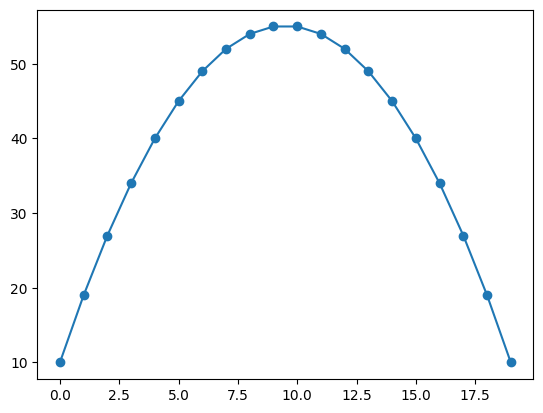

In [24]:
import pylab as plt
plt.plot(x.detach().numpy(),'-o')


# Neural Networks



Les réseaux de neurones peuvent être construits à l'aide du package ``torch.nn``.

Maintenant que vous avez eu un aperçu de « autograd », « nn » dépend de
``autograd`` pour définir des modèles et les différencier.
Un ``nn.Module`` contient des couches et une méthode ``forward(input)`` qui
renvoie la « sortie ».

Une procédure d'entraînement typique pour un réseau de neurones est la suivante :

- Définir le réseau neuronal qui possède certains paramètres à apprendre (ou
  poids)
- Itérer sur un ensemble de données d'entrées
- Calculer la perte (dans quelle mesure la sortie est-elle correcte)
- Faire de la backpropagation dans les paramètres du réseau
- Mettre à jour les poids du réseau, généralement à l'aide d'une simple règle de mise à jour :
  ``poids = poids - taux d'apprentissage * gradient``

## Définir le réseau

Définissons un réseau :

In [25]:
%matplotlib inline

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, (5,5))
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


 <font color='blue'> **Question** : Décrire l'architecture du réseau </font>

 <font color='blue'> **Question** : Afficher les poids et biais de la première convolution </font>

In [34]:
net.conv1.bias

Parameter containing:
tensor([ 0.0490, -0.1315,  0.0729, -0.1775, -0.0916, -0.1923],
       requires_grad=True)

In [35]:
net.conv1.weight

Parameter containing:
tensor([[[[-0.0415,  0.0002,  0.0498, -0.1645, -0.1227],
          [-0.0633,  0.1347,  0.1116,  0.0188, -0.0160],
          [-0.0381,  0.0180, -0.1508, -0.1600, -0.0796],
          [-0.0646, -0.0335,  0.1563, -0.1284,  0.0959],
          [-0.0456, -0.0216, -0.1050, -0.1479, -0.0844]]],


        [[[ 0.0157, -0.1057, -0.0775, -0.1131, -0.1058],
          [-0.1267,  0.1749, -0.1036,  0.0512,  0.1485],
          [ 0.1120, -0.0060, -0.0313, -0.1069, -0.1267],
          [-0.0101,  0.1395, -0.0469,  0.0065, -0.1681],
          [ 0.1731, -0.1673, -0.1040, -0.0474, -0.1614]]],


        [[[ 0.0326,  0.1080,  0.1181,  0.1503,  0.0213],
          [-0.1071, -0.1947, -0.0436, -0.0126,  0.0254],
          [ 0.1758, -0.0990,  0.0153, -0.0044,  0.1941],
          [ 0.1644, -0.1827, -0.1653,  0.0048, -0.0985],
          [-0.1942,  0.1863,  0.0763,  0.0808, -0.1709]]],


        [[[ 0.0824,  0.0845, -0.1871,  0.0504, -0.0463],
          [-0.0364,  0.1394, -0.0115, -0.1679,  0.0888

Il suffit de définir la fonction ``forward`` et la fonction ``backward``
la fonction (où les gradients sont calculés) est automatiquement définie pour vous
en utilisant ``autograd``.
Vous pouvez utiliser n'importe laquelle des opérations Tensor dans la fonction « forward ».

Les paramètres apprenables d'un modèle sont renvoyés par ``net.parameters()``



In [39]:
params = list(net.parameters())
print(len(params))
#print(params[0].size())  # conv1's .weight
#print(params[1].size())

for k in range(10) :
  print(params[k].size())

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


**Attention !**
Quand on parle du nombre de paramètres d'un réseau, on parle du nombre de nombres réels dans les matrices, biais et noyaux impliqués dans le réseau (comme dans le cours).

 <font color='blue'> **Question** : Combien de paramètres a ce réseau ? </font>

In [40]:
nb_params = 0
for k in range(len(params)) :
  nb_params += torch.prod(torch.tensor(params[k].size()))
print(nb_params)

tensor(61706)


Essayons d'envoyer une image aléatoire en entrée.


 <font color='blue'> **Question** : Testez le réseau sur une entrée aléatoire qui est une image en niveaux de gris (un canal) de taille $32 \times 32$.</font>

In [44]:
input = torch.randn(2,1,32,32) #2 correspond au nombre d'images envoyées
out = net(input)
print(out)
print(out.shape)

tensor([[-0.0658, -0.1269,  0.0773,  0.0047,  0.0465, -0.0426, -0.0761,  0.0431,
         -0.0662,  0.0993],
        [-0.0804, -0.1224,  0.0875, -0.0139,  0.0504, -0.0495, -0.0761,  0.0481,
         -0.0681,  0.0877]], grad_fn=<AddmmBackward0>)
torch.Size([2, 10])


##  <font color='blue'> Exercice </font>

1. Nous aimerions définir un réseau qui classe les images de taille $(3,32,32)$.
Construire une classe Net() qui applique :
- une convolution avec $6$ canaux en sortie et un noyau de taille $5 \times 5$, suivi d'un ReLu
- un max pooling de taille $2 \times 2$
- une convolution avec $16$ de canaux en sortie et un noyau de taille $3 \times 3$, suivi d'un ReLu
- un  max pooling de taille $2 \times 2$
- une couche linéaire avec une taille de sortie de $120$, suivie d'un ReLu
- une couche linéaire avec une taille de sortie de $84$, suivie d'un ReLu
- une couche linéaire avec une taille de sortie de $10$

Vérifiez que cela fonctionne avec une entrée aléatoire.

2. Dessinez le réseau comme cela est fait dans les dernières slides du cours.

In [56]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*6*6,120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        x = F.relu(x)
        print(x.shape)
        x = F.max_pool2d(x, (2, 2))
        print(x.shape)
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        #rint(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [57]:
x = torch.randn(1,3,32,32)
net(x)

torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])


tensor([[ 0.0510,  0.0084, -0.1646,  0.0149, -0.1004,  0.0222, -0.0008,  0.0204,
          0.0579,  0.1069]], grad_fn=<AddmmBackward0>)

# Retour sur le TP1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, t = make_gaussian_quantiles(n_features=2, n_classes=3, n_samples=500)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=12)
# Number of points in each set:
N_train = X_train.shape[0]
N_test = X_test.shape[0]

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k');
plt.show()

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

d = 5
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,d)
        self.fc2 = nn.Linear(d, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net2 = Net()


<font color='blue'> Question : Reconnaissez-vous le réseau ci-dessus ?</font>

In [ ]:
net.fc1.bias.requires_grad = False
net.fc1.weight.requires_grad = False


<font color='blue'> Question : Qu'est-ce qui est fait ci-dessus ?</font>

In [ ]:


W1 =torch.randn(d,2)
b1 = torch.randn(d)
net.fc2.bias = torch.nn.Parameter(b1)
net.fc2.weight = torch.nn.Parameter(W1)
net2.fc2.bias = torch.nn.Parameter(b1)
net2.fc2.weight = torch.nn.Parameter(W1)


W2 =torch.randn(3,d)
b2 = torch.randn(3)
net.fc2.bias = torch.nn.Parameter(b2)
net.fc2.weight = torch.nn.Parameter(W2)
net2.fc2.bias = torch.nn.Parameter(b2)
net2.fc2.weight = torch.nn.Parameter(W2)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.75)
optimizer2 = optim.SGD(net2.parameters(), lr=0.75)

In [ ]:

for epoch in range(10**3):  # loop over the dataset multiple times
    # zero the parameter gradients
    optimizer.zero_grad()
    optimizer2.zero_grad()
    # forward + backward + optimize
    output = net(X_train)
    loss = criterion(output, t_train)
    loss.backward()
    optimizer.step()
    # forward + backward + optimize
    output2 = net2(X_train)
    loss2 = criterion(output2, t_train)
    loss2.backward()
    optimizer2.step()

print('Finished Training')


In [ ]:
#visualize results:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
X_grid = np.hstack((xx.ravel(), yy.ravel()))

N_grid = xx.ravel().shape[0]
X_grid = np.c_[xx.ravel(), yy.ravel()]

feature_transform = lambda x : (net(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).detach().numpy())
feature_transform2 = lambda x : (net2(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).detach().numpy())


Phi_grid = feature_transform(X_grid)
Phi_grid2 = feature_transform2(X_grid)

Z =np.argmax(Phi_grid,axis=2)
Z = Z.reshape(xx.shape)

figure = plt.figure(figsize=(16, 8))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')

Z2 =np.argmax(Phi_grid2,axis=2)
Z2 = Z2.reshape(xx.shape)
figure = plt.figure(figsize=(16, 8))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z2,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')

# Test image

In [58]:
!git clone 'https://github.com/emilePi/denis'

Cloning into 'denis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 134.46 KiB | 10.34 MiB/s, done.


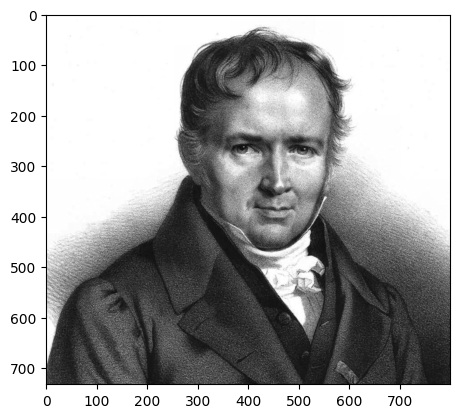

In [59]:
import io
import requests
from PIL import Image
from torchvision.transforms.functional import to_tensor
import pylab as plt
import numpy as np
img = to_tensor(Image.open('./denis/denis.jpeg'))
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap=plt.cm.gray)
plt.show()


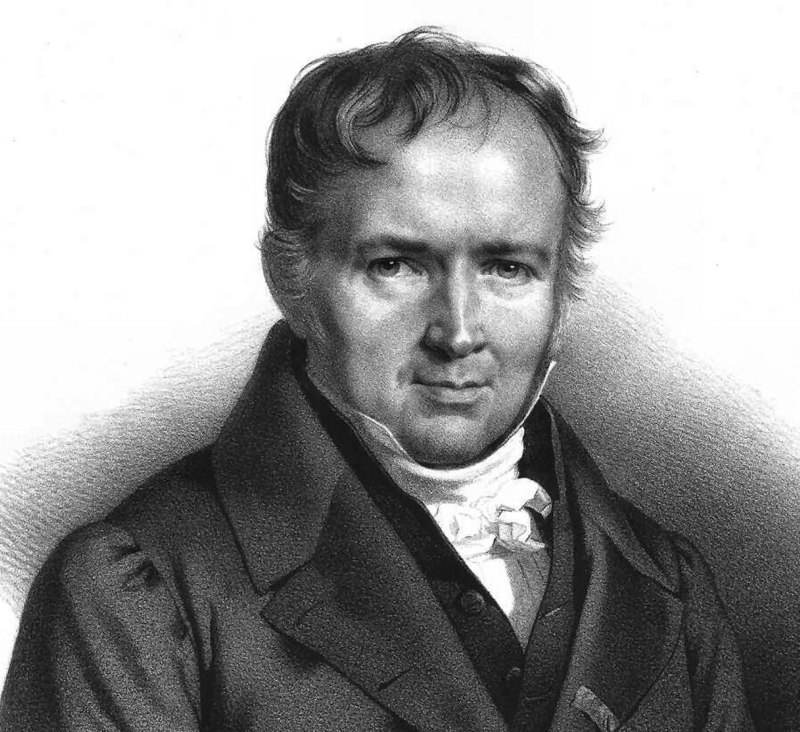

In [60]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from IPython.display import display
from PIL import Image

im_pil = Image.open('./denis/denis.jpeg')
display(im_pil)